## BUSINESS UNDERSTANDING
PROBLEMS AND OBJECTIVES

we have collection of student's information on Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced, Performance Index

And we want to predict performance index on the basis of all remaining information.

This way a student performance index can be predicted on the basis of remaining information.

## Data Understanding

1. Data Acquisition

In [1]:
import pandas as pd 
dataset = pd.read_csv('dataset/Student_Performance.csv')
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


2. EDA : Exploratory Data Analysis + Data Quality Verification

a. Quick Summary of Data

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


So, I have 6 columns out of which 4 are of int64 dtype, one is float64 dtype and another categorical.
Total Entries are : 10000

b. Descriptive Statistics of the data

In [3]:
# first for numerical value only
import numpy as np
dataset.describe(include=np.number)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


So for Hours Studies, count is 10000, min value is 1 , max value is 9. 
Similarly, we can see values for other columns also.

In [4]:
# now for categorical value also
dataset.describe(include=['O'])

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


For categorical column, extracurricular activities, we have count of 10k, 2 unique values, top frequency value is 'No' with freq of 5052

Now Let's plot a histogram to see the count of each numerical range or bin

/tmp/ipykernel_126878/2301867583.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.select_dtypes(np.number).hist(ax=ax)


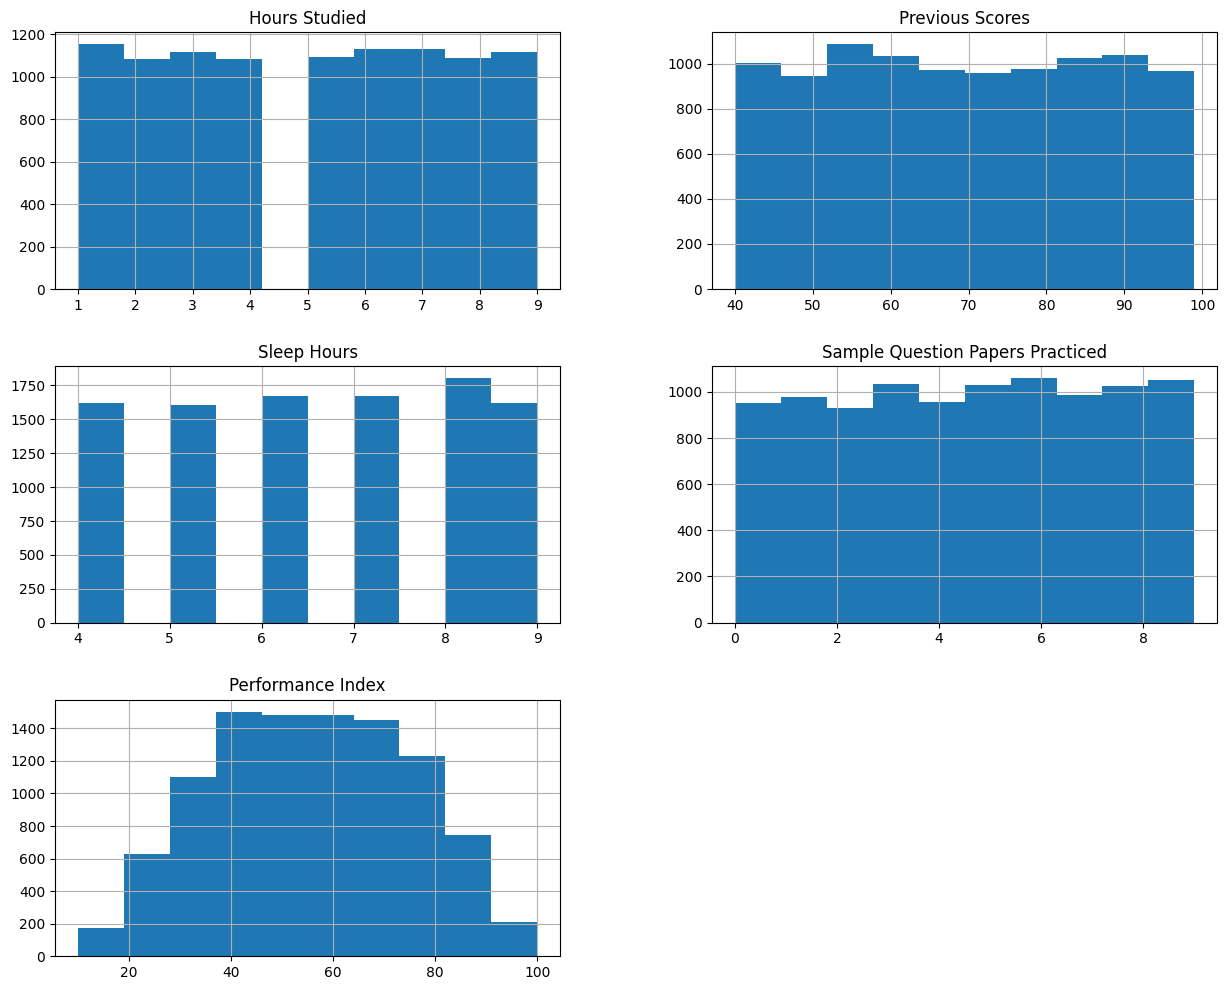

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (15,12))
ax = fig.gca()
dataset.select_dtypes(np.number).hist(ax=ax)
plt.show()

So looks like each numerical column is distributed evenly. There is no skewness seen. Output variable: performance index seems to be symmetrical. In hours studied 

Now, let's see correlation matrix for relationship between multiple variables.

In [6]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


<Axes: >

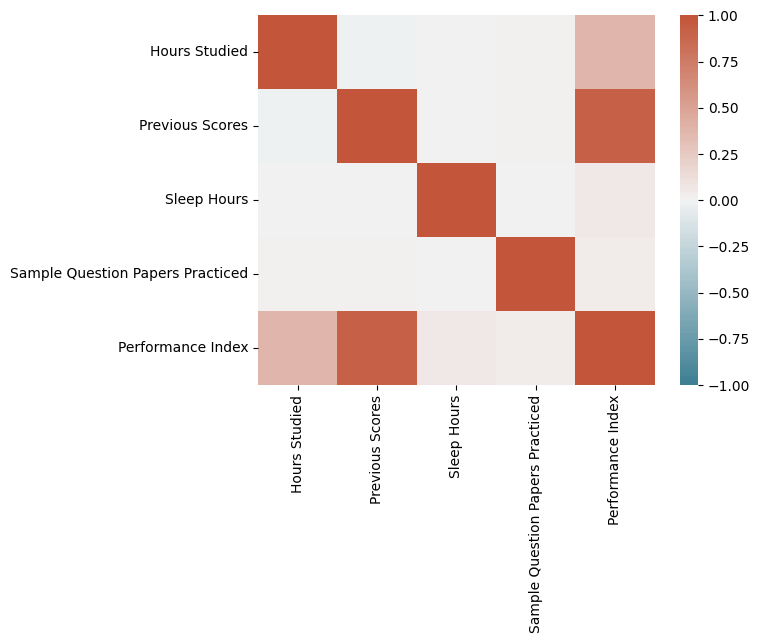

In [7]:
import seaborn as sns
sns.heatmap(dataset.select_dtypes(include=np.number).corr(), 
            vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

Now, bar graph for categorical values

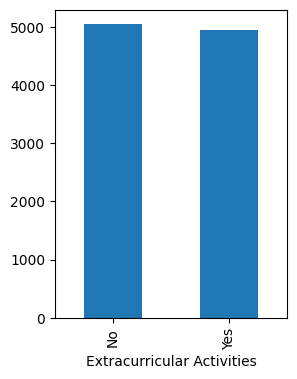

In [8]:
plt.figure(figsize=(3,4))
for category in dataset.select_dtypes(include='O'):
  dataset[category].value_counts().plot(kind='bar')
  plt.show()

## DATA QUALITY VERIFICATION
1. Missing Values
2. Outlier Values
3. Unusable Data
4. Imbalance Data
5. Data Quality Checks

Let's see missing values

In [9]:
dataset.isna().value_counts()

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  Sample Question Papers Practiced  Performance Index
False          False            False                       False        False                             False                10000
Name: count, dtype: int64

No missing values in dataset. Cheers

Now, let's look for outliers
we'll use boxplot for this.

In [10]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 30, 10

<Axes: >

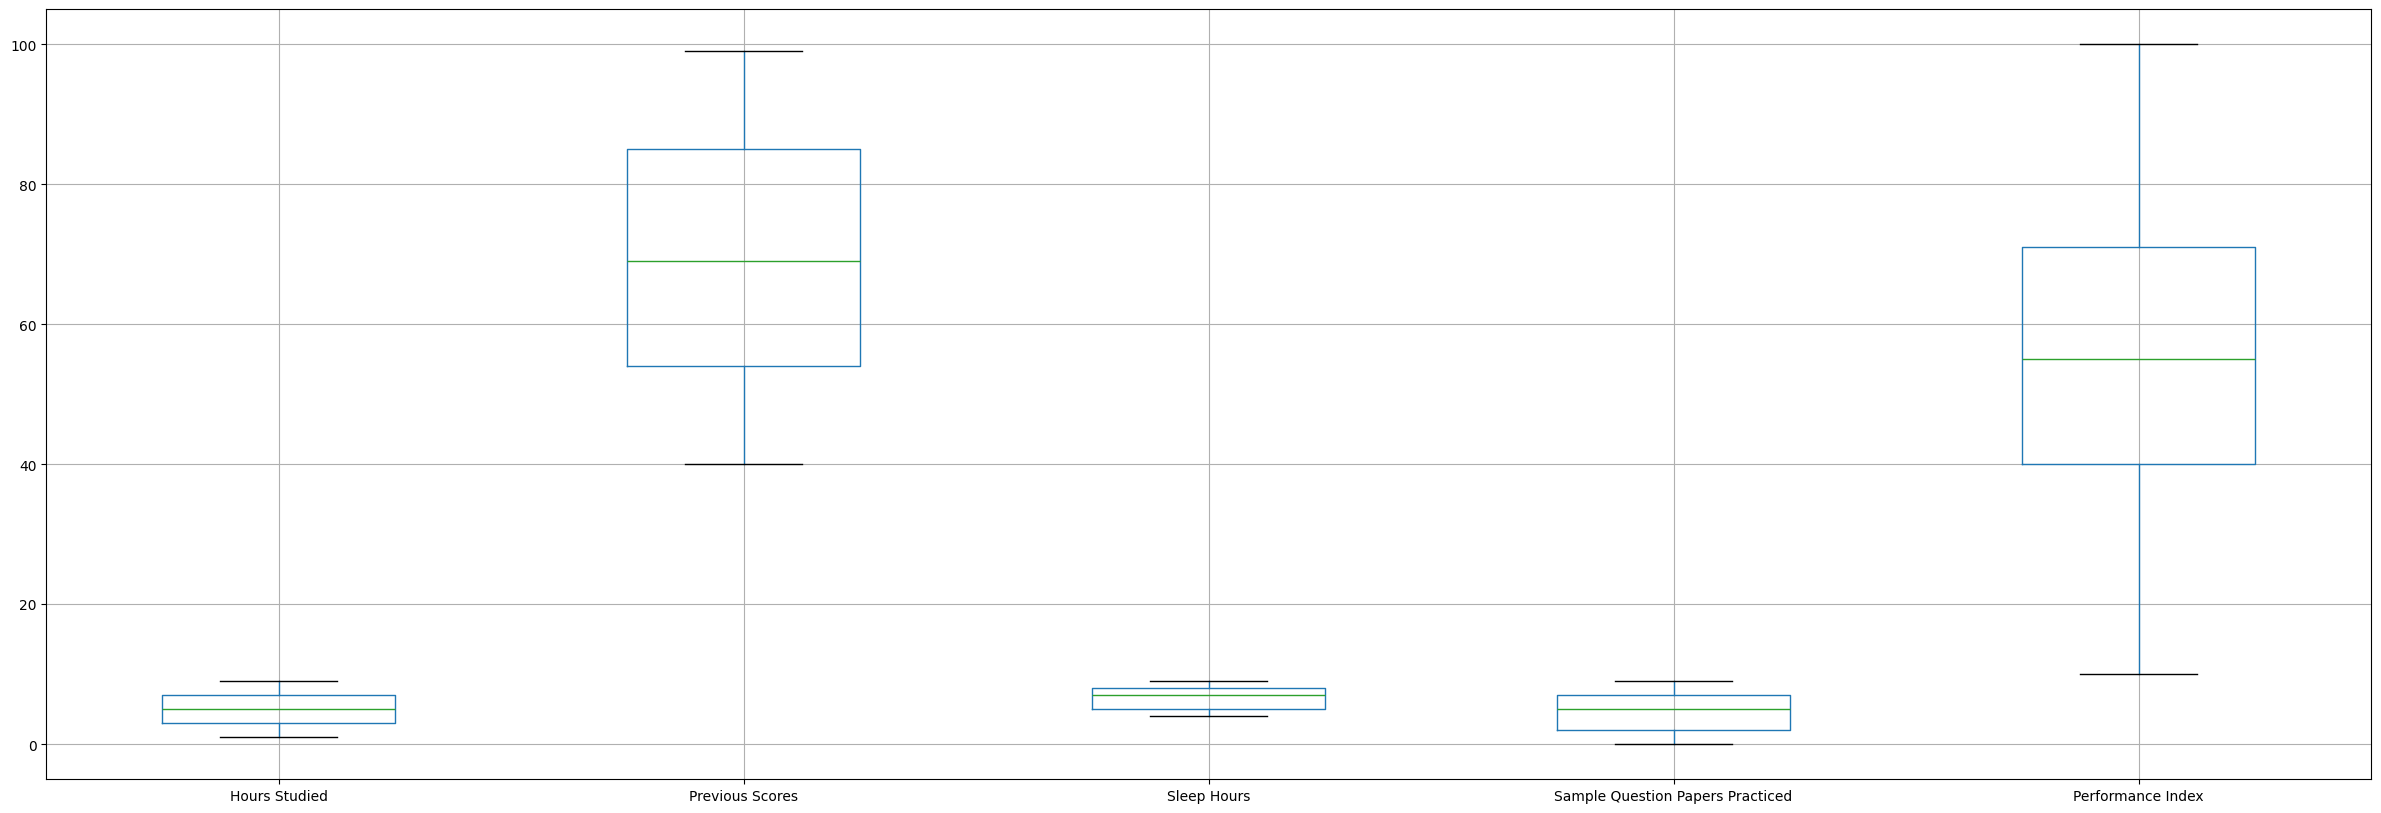

In [11]:
dataset.select_dtypes(include=np.number).boxplot()

there's no outliers too

Let's see imbalanced data

<Axes: xlabel='Hours Studied', ylabel='count'>

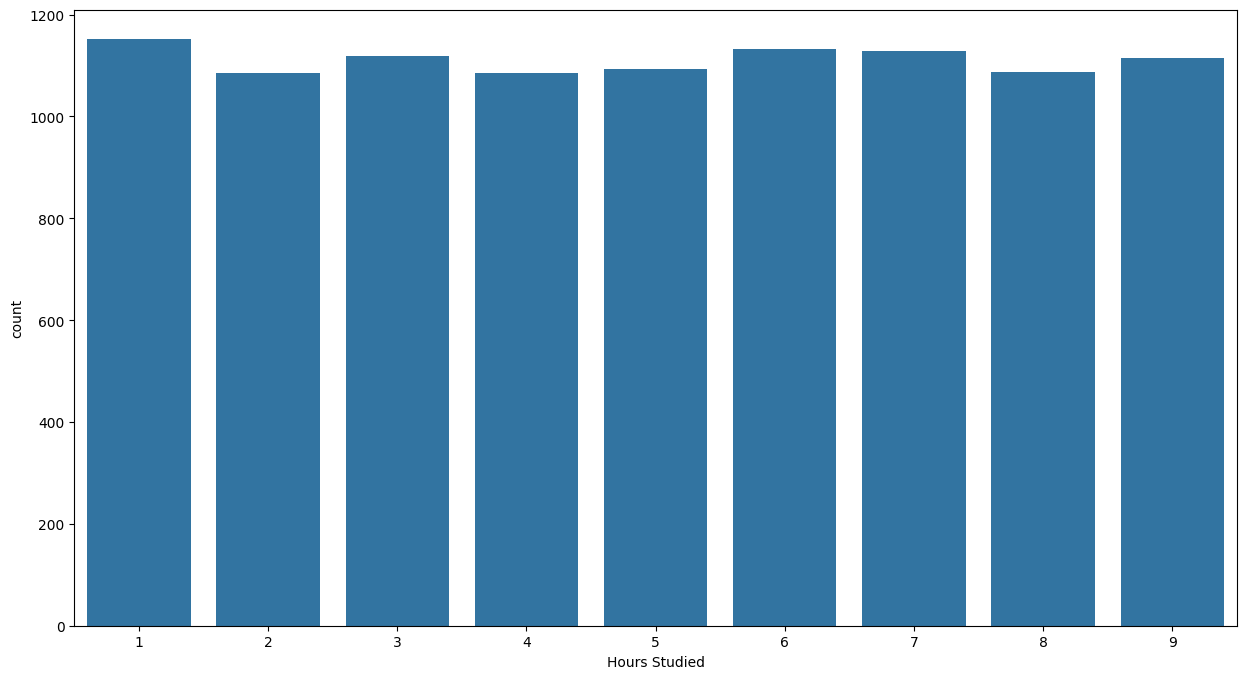

In [12]:
mpl.rcParams['figure.figsize'] = 15, 8
sns.countplot(x = 'Hours Studied', data=dataset)

<Axes: xlabel='Previous Scores', ylabel='count'>

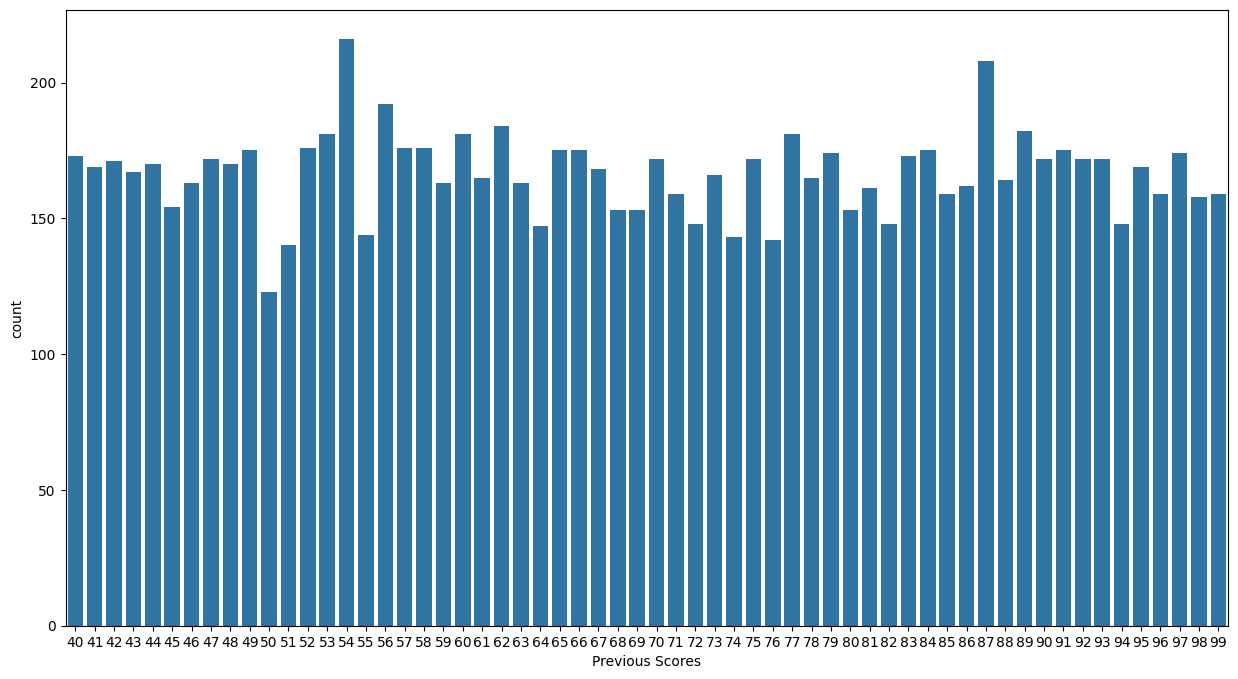

In [13]:
sns.countplot(x = 'Previous Scores', data=dataset)

<Axes: xlabel='Sleep Hours', ylabel='count'>

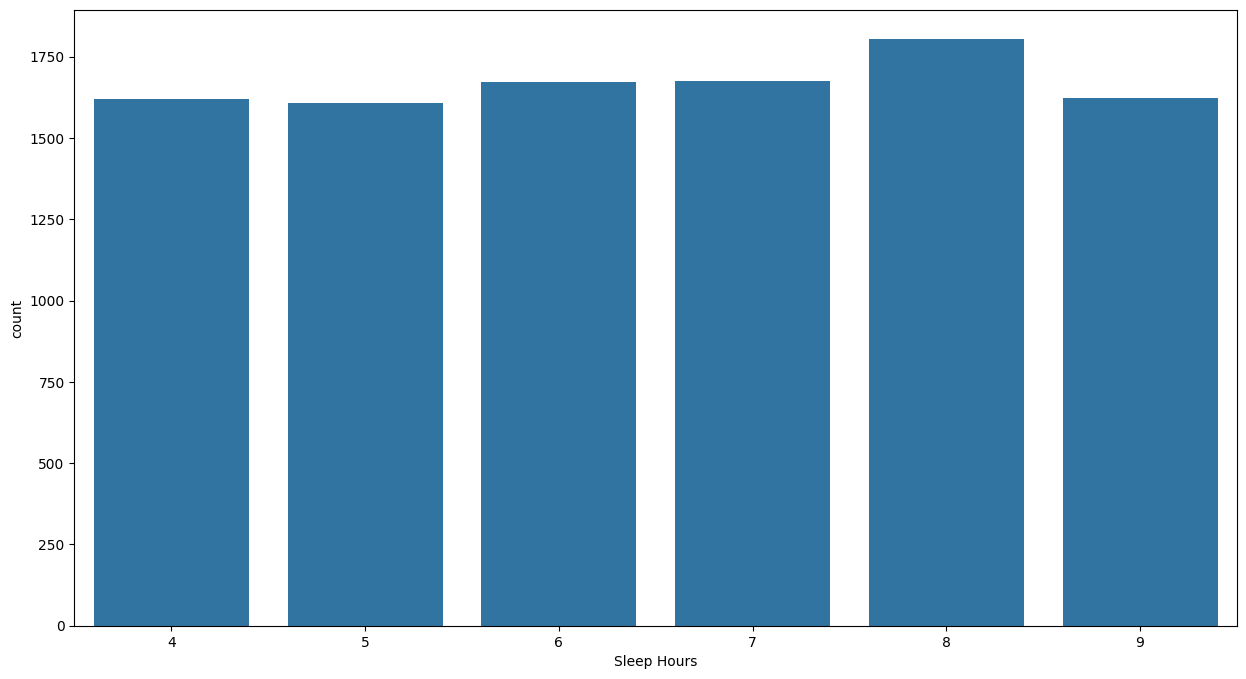

In [14]:
sns.countplot(x = 'Sleep Hours', data=dataset)

<Axes: xlabel='Sample Question Papers Practiced', ylabel='count'>

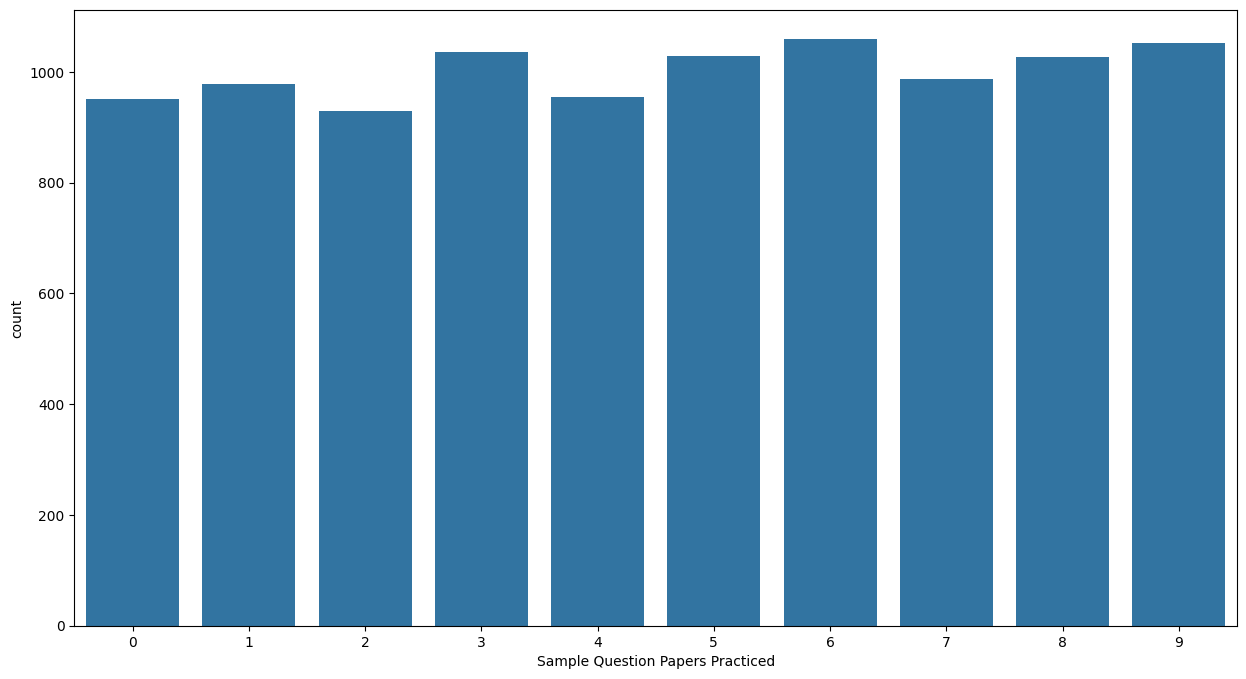

In [15]:
sns.countplot(x = 'Sample Question Papers Practiced', data=dataset)

<Axes: xlabel='Performance Index', ylabel='count'>

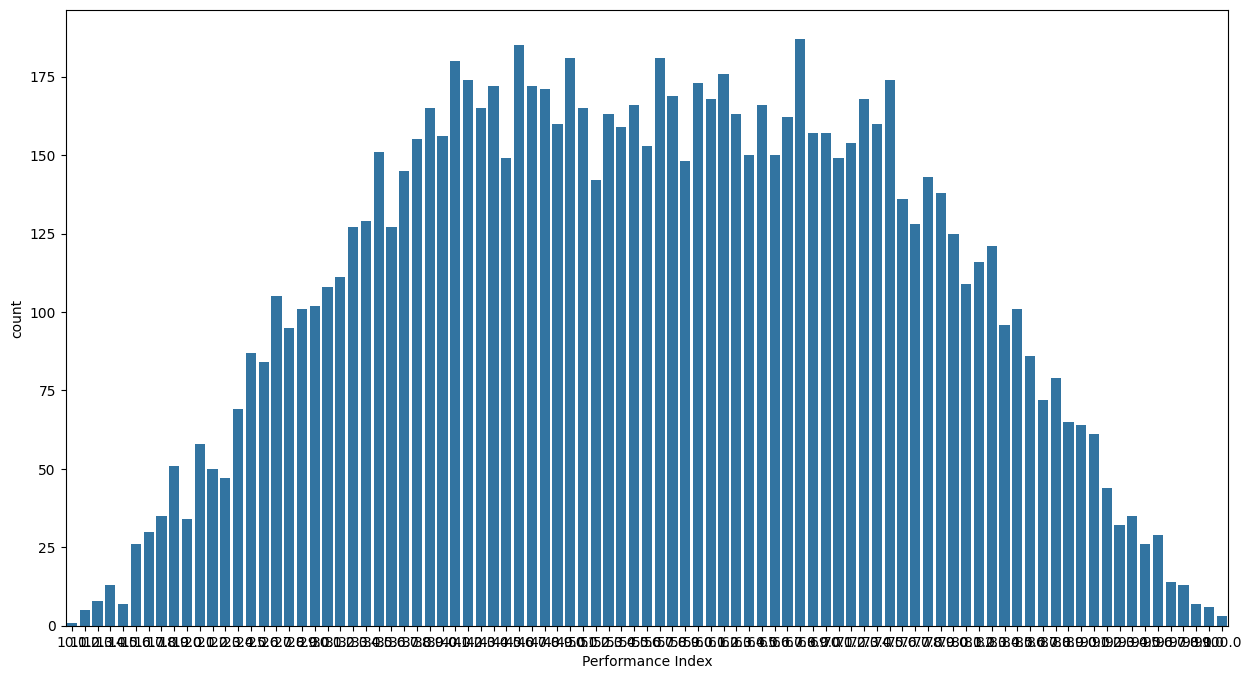

In [16]:
sns.countplot(x = 'Performance Index', data=dataset)

# DATA PREPARATION
HERE, WE PREPARE RAW DATA FOR ANALYSIS AND MODELING.
1. Clean the data
--> a. Handle Missing Data
--> b. Handle Outliers

Since we have no missing values and outliers. But in real life cases, there will be missing values and outlier values.

Handling Missing Values
1. Deletion
2. Imputation on the basis of mean/median for numerical and frequency for categorical

Handling Outlier Values
1. Drop outlier records
2. Assign new values to them

# Encoding the data

categorical values are not possible to mathematically compute by machines. it needs and demands data in numerical format. so categorical data need to be encoded to numerical form.
As of category, we have only 2 for column extracurricular activities. so label encoding is just enough.

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['Extracurricular Activities'] = encoder.fit_transform(dataset['Extracurricular Activities'])

In [18]:
dataset['Extracurricular Activities'].value_counts()

Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64

# Split the dataset

In [19]:
from sklearn.model_selection import train_test_split
y = dataset['Performance Index']
X = dataset.drop(columns=['Performance Index'])

In [20]:
X.shape

(10000, 5)

In [21]:
y.shape

(10000,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
X_train.shape

(8000, 5)

## MODELING
Trying Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

model = reg.fit(X_train, y_train)

In [25]:
model.score(X_train, y_train)

0.9889033042773491

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 4.105609215835835
Mean Absolute Error: 1.6229708329710886
R-squared: 0.9880686410711422


/tmp/ipykernel_126878/4228255573.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


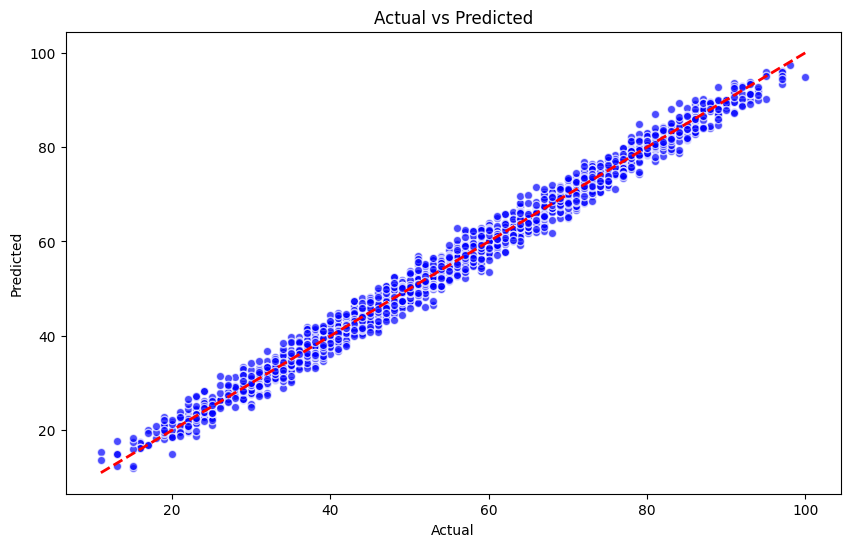

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [31]:
type(dataset) == pd.DataFrame

True